# Sección XI
# Channels

And channels are a higher level order way, a better way for synchronizing your code and writing concurrent code.

 A channel provides a mechanism for concurrently executing functions to communicate by sending and receiving values of a specified element type. The value of an uninitialized channel is nil. 
 
  A new, initialized channel value can be made using the built-in function make, which takes the channel type and an optional capacity as arguments: 

In [1]:
import "fmt"

In [ ]:
Este no corre. Se Bloquea.
Dejo esto al inicio para no bloquear tambien el kernel de jupyter

func main(){
    c:=make(chan int)
    c<-42               // it's nothing to pull it of
    fmt.Println(<-c)
}
main()

 The optional <- operator specifies the channel direction, send or receive. If a direction is given, the channel is directional, otherwise it is bidirectional. A channel may be constrained only to send or only to receive by assignment or explicit conversion.

- chan T................. can be used to send and receive values of type T
- chan<- float64......... can only be used to send float64s
- <-chan int............. can only be used to receive ints


Hace un canal y luego viene y trata de poner 42 en el canal y se bloquea.


Porque cuando envías y recibes en un canal, es como los corredores de relevos, corredores en una carrera de pista que tienen que pasar un bastón y tienen que pasarlo de mano en mano.


Y la transacción no puede ocurrir, ¿verdad? No puede ocurrir hasta que **el envío y la recepción puedan ocurrir al mismo tiempo**.


Y si no pueden ocurrir al mismo tiempo, bloquea los bloques de envío y recepción hasta que el receptor... esté listo para hacerlo.

Esta es una de las cosas más importantes que tienes que saber sobre el uso de canales y rutinas go es entender esta idea. Los canales bloquean.


In [3]:
func main(){
    c:=make(chan int)
    
    go func(){
        c<-42            // Este canal se lanza afuera y se está ejecutando
                         // This code blocks too. Pero como está afuera de flujo del main
                         // Si puede ejecutar aunque se bloquea la funcion go
    }()
    
    fmt.Println(<-c)    // Pero main sigue avanzando y llega a este punto donde 
                        //  it takes the value off.
}
main()

// Es como carreras de relevos, go func no puede avanzar hasta que tenga a quien pasarle 
// la info

42 true


In [5]:
func main(){
    c:=make(chan int)
    
    go func(){
        c<-42           
        fmt.Println("Acá se desbloquea, quizas? (y el 3)")
        
    }()
    
    fmt.Println("Yo digo que como go está bloquedo 1 pasa acá\n")
    fmt.Println("Yo esperaba que este fuera el segundo",<-c)    
}
main()

// Es como carreras de relevos, go func no puede avanzar hasta que tenga a quien pasarle 
// la info

Yo digo que como go está bloquedo 1 pasa acá

Acá se desbloquea, quizas? (y el 3)
Yo esperaba que este fuera el segundo 42


## Capacity as  arguments:

The capacity, in number of elements, sets the size of the **buffer**(almacenamiento) in the channel. If the capacity is zero or absent, the channel is unbuffered and communication succeeds only when both a sender and receiver are ready. Otherwise, the channel is buffered and communication succeeds without blocking if the buffer is not full (sends) or not empty (receives).




- Buffer: In computer science, a buffer is temporary storage we use when one component feeds data to the other, but their speeds aren’t the same.

Ahora bien, el productor puede generar datos más rápido de lo que el consumidor puede procesarlos. En ese caso, este último se quedará con algunos datos y, por tanto, generará resultados subóptimos o incluso incorrectos. Para evitarlo, utilizamos un búfer de tamaño suficiente entre ambos.

Así, el búfer actúa como almacenamiento intermedio. El productor coloca los datos generados en el búfer. El consumidor toma los elementos de uno en uno a la velocidad a la que puede procesarlos. Si su procesamiento es más lento que la generación de datos, esperará a que el consumidor los coja. Mientras tanto, el productor seguirá poniendo los datos en el búfer, por lo que no se perderá ningún elemento.

Los buffers son útiles cuando hay un desajuste entre las tasas de generación y procesamiento de datos. Sin embargo, necesitamos establecer su tamaño adecuadamente.


- https://www.baeldung.com/cs/buffer

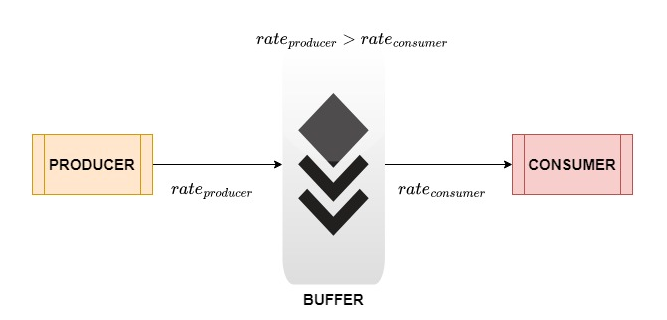

In [2]:
func main(){
    c:=make(chan int,1)    
    c<-42                 // Aca lo enviamos
    fmt.Println(<-c)      // Acá lo recibimos
    fmt.Printf("%T",c)    // (el true no es arrojado cuando está en terminal)
}
main()

42 true
chan int

In [2]:
Este tampoco corre porque c solo tiene espacio para 1
El kernel en Jupyter muere
func main(){
    c:=make(chan int,1)
    c<-42
    c<-43
    
    fmt.Println(<-c)    
}
main()

ERROR: repl.go:1:6: expected ';', found 'IDENT' tampoco

In [3]:
//successful buffer
func main(){
    c:=make(chan int,2)
    c<-42
    c<-43
    
    fmt.Println(<-c)  // Como que se quedan en cola, hasta que usarlos los desbloquea  
    fmt.Println(<-c)  
}
main()

42 true
43 true


*try to stay away from buffer channels. There's a time and place for them. But more than more than anything, what you want to do if you want to use buffered channels. You want to make sure that your code is built in such a way that there's always that interlocking component where a pass will happen between putting on the channel and taking off the channel.*

In [1]:

import "fmt"
func main() {
    c := make(chan int)
    go func() {
        c <- 42
    }()
    
    // Otra forma en que salga! la info del canal
    v, ok := <-c

    fmt.Println(v, ok)
}
main()

42 true


In [ ]:
import "fmt"
func main() {
    c := make(chan int)
    go func() {
        c <- 42
    }()
    
    // Ojo! Aca envia un panic!
    //close(c) // Porque lo cierra antes de hacer la go func
    v, ok := <-c

    fmt.Println(v, ok)
}
main()

In [1]:
import "fmt"
func main() {
    c := make(chan int)
    
    go func() {
        c <- i
        close(c)
    }()
    
    // Otra forma en que salga! la info del canal
    v, ok := <-c

    fmt.Println(v, ok)
    
    v, ok = <-c
    fmt.Println(v, ok)
    
}
main()

42 true
0 false


Los anteriores fueron bidireccionales porque en una parte los recibiamos y en otra lo enviábamos. Ahora veremos:

## Unidirectional channels:
Solo puedes recibir o solo puedes enviar.

Eso puede ser util si se está creando una función solo para hacerla más *readable* (leible/capable of being processed or interpreted by a computer or other electronic device).

You'll know a little bit more just reading the code what's going on. Que en una determinada funcion, solo recibiras valores o solo enviarás valores

In [3]:
func main(){
    c:=make(chan <- int,2)  // solo recibe
                            // Solo puedo enviar valores al canal
    c<-42    // Esto se permite
    c<-43    // al igual que esto
    
    fmt.Println(<-c)  // Pero acá habrá una operación inválida  
    fmt.Println(<-c)  // Estoy tratando de pull off. Será invalido
}
main()

ERROR: repl.go:7:19: cannot receive from send-only channel unary operation <- on <chan<- int>: <- c

In [4]:
func main(){
    c:=make(chan <- int,2)  // solo recibe
                            // Solo puedo enviar valores al canal
    c<-42    // Esto se permite
    c<-43    // al igual que esto
    
    fmt.Printf("%T",c)
}
main()

ERROR: reflect.MakeChan: unidirectional channel type

In [6]:
func main(){
    c:=make(<-chan int,2)  // solo envía
                            // Solo puedo enviar valores al canal
    c<-42    // Esto se permite
    c<-43    // al igual que esto
    
    //fmt.Println(<-c)  // Pero acá habrá una operación inválida  
    //fmt.Println(<-c)  // Estoy tratando de pull off. Será invalido
}
main()

ERROR: repl.go:4:5: cannot send to receive-only channel type <-chan int: c <- 42

In [7]:
func main() {
    c := make(chan int)
    cr := make(<-chan int) // receive
    cs := make(chan<- int) // send

    fmt.Println("-----")
    fmt.Printf("c\t%T\n", c)     //chan int
    fmt.Printf("cr\t%T\n", cr)   //<-chan int
    fmt.Printf("cs\t%T\n", cs)   //chan<- int
}
main()

//Parece que jupyter no ayuda con esto

ERROR: reflect.MakeChan: unidirectional channel type

In [13]:
func main(){
    cs:= make(chan<- int)
    
    go func(){
        cs <- 42
    }()
    
    fmt.Println(<-cs) // aca estoy tratando de sacarlo por lo que no se puede
}

ERROR: repl.go:8:19: cannot receive from send-only channel unary operation <- on <chan<- int>: <- cs

In [15]:
func main() {
    c := make(chan int)
    cr := make(<-chan int) // receive
    cs := make(chan<- int) // send

    fmt.Println("-----")
    fmt.Printf("c\t%T\n", c)     //chan int
    fmt.Printf("cr\t%T\n", cr)   //<-chan int
    fmt.Printf("cs\t%T\n", cs)   //chan<- int
    
    
    // specific to general doesn't
    c = cr // Por eso esto no funciona (Como convertir un float en un int)
    c = cs
}
main()

ERROR: repl.go:11:5: error compiling assignment: c = cr
	repl.go:11:5: incompatible types in assignment: chan int = <-chan int

In [16]:
// Sin embargo, el caso contrario si funciona
func main() {
    c := make(chan int)
    cr := make(<-chan int) // receive
    cs := make(chan<- int) // send

    fmt.Println("-----")
    fmt.Printf("c\t%T\n", c)     //chan int
    fmt.Printf("cr\t%T\n", cr)   //<-chan int
    fmt.Printf("cs\t%T\n", cs)   //chan<- int
    
    
    // general to specific assigns
    cr = c   // Aqui si! (Como convertir un float en un int)
    cs = c
}
main()

// https://go.dev/play/p/OLyl32jeUe5

ERROR: reflect.MakeChan: unidirectional channel type

In [18]:

func main() {
    c := make(chan int)
    cr := make(<-chan int) // receive
    cs := make(chan<- int) // send

    fmt.Println("-----")
    fmt.Printf("c\t%T\n", c)
    fmt.Printf("cr\t%T\n", cr)
    fmt.Printf("cs\t%T\n", cs)

    // General to specific converts
    fmt.Println("-----")
    fmt.Printf("c\t%T\n", (<-chan int)(c))
    fmt.Printf("c\t%T\n", (chan<- int)(c))

}
main()
// https://go.dev/play/p/hB405hurFz3

ERROR: reflect.MakeChan: unidirectional channel type

## Using Channels

In [19]:
func main(){
    
    c:= make(chan int)
    
    //send
    go foo()
    
    //receive
    go bar()
    
    fmt.Println("about to exit")
    
}

// send
func foo(){}

// receive
func bar(){}

In [12]:
func main(){
    
    c:= make(chan int)
    
    //send
    go foo(c)
        
    //receive
    go bar(c)
    
    fmt.Println("about to exit")
    
}

// send
func foo(c2 chan<- int){
    c2<-42
    fmt.Println("estoy en foo")
}

// receive
func bar(c3 <-chan int){
    fmt.Println("estoy en foo")
    fmt.Println(<-c3)
}
main()

//Como son funciones Go no alcanzan a ejecutarse

about to exit


In [16]:
func main(){
    
    c:= make(chan int)
    
    //send
    go foo(c)
    
    //receive
    bar(c)    // Tendrá que esperar hasta que esta se ejecute
              // No necesitaré wait groups porque estoy bloqueandola 
              // los canales bloquean
    
    fmt.Println("about to exit")
    
}

// send
func foo(c chan<- int){
    fmt.Println("about 1")
    
    c<-42
    fmt.Println("about 2")
    
}

// receive
func bar(c <-chan int){
    fmt.Println("about 3")
    
    fmt.Println(<-c)
    fmt.Println("about 4")
    
}
main()

// UN DOBLE CHECK PARA NOSOTROS MISMO SERÍA CORRER EN TERMINAL:
// GO RUN -RACE 

about 3
about 1
about 2
42 true
about 4
about to exit


In [26]:
func main() {
    c := make(chan int)

    go send(c)

    receive(c)

    fmt.Println("about to exit")
}

// send channel
func send(c chan<- int) {
    c <- 42
}

// receive channel
func receive(c <-chan int) {
    fmt.Println("the value received from the channel:", <-c)
}
main()

the value received from the channel: 42
about to exit


## Alcance de un canal y el cierre de un canal:

In [17]:
import "fmt"
func main(){
    
    c:= make(chan int)
    
    //send
    go foo(c)
    
    //receive
    bar(c)    // Tendrá que esperar hasta que esta se ejecute
              // No necesitaré wait groups porque estoy bloqueandola 
              // los canales bloquean
    
    fmt.Println("about to exit")
    
}

// send
func foo(c chan<- int){
    for i:=0; i<10; i++{
        c<-i
    }
}

// receive
func bar(c <-chan int){
    fmt.Println(<-c)
}
main()

// UN DOBLE CHECK PARA NOSOTROS MISMO SERÍA CORRER EN TERMINAL:
// GO RUN -RACE 

0 true
about to exit


In [7]:
import "fmt"
func main(){
    
    c:= make(chan int)
    
    //send
    go foo(c)
    
    //receive
    for v := range c{
        fmt.Println(v)  // Es un loop sobre el canal hasta que se cierra
    }
    
    fmt.Println("al final c no es ningun arreglo",c)
    
}

// send
func foo(cc chan<- int){
    for i:=0; i<10; i++{
        cc <- i
    }
    close(cc) // de lo contrario falla
}


main()

// UN DOBLE CHECK PARA NOSOTROS MISMO SERÍA CORRER EN TERMINAL:
// GO RUN -RACE 

0
1
2
3
4
5
6
7
8
9
al final c no es ningun arreglo 0xc00003c300


In [13]:
// Solo una reescritura más compacta

import "fmt"
func main(){
    
    c:= make(chan int)
    
    //send
    go func (){
        for i:=0; i<10; i++{
            c <- i
        }
        close(c)
    }()
    
    //receive
    for v := range c {   // Range no se detiene a menos que el canal se cierre
        fmt.Println(v)  // Es un loop sobre el canal hasta que se cierra
    }
    
    fmt.Println("al final c no es ningun arreglo",c)
    
}




main()

0
1
2
3
4
5
6
7
8
9
al final c no es ningun arreglo 0xc00003c300


## Select statement

Using a select statement to pull values off of multiple channels and a select statement will pull whatever value is ready to be pulled off of that channel.


In [14]:
func main(){
    eve := make (chan int)
    odd := make (chan int)
    quit := make (chan int)
    
    // send to the channel
    // go send(eve,odd,quit)
    
}

func sent(e,o,q chan<- int){
    for i:=0; i<10; i++{
        if i%2==0{
            e <- i 
        }else {
            o <- i
        }
    }
    close(e)
    close(o)
    q <-0
}

In [3]:
import "fmt"
func main(){
    eve := make (chan int)
    odd := make (chan int)
    quit := make (chan int)
    
    // send
    go send(eve,odd,quit)
    
    //receive
    // Pongamos los valores fuera del canal
    
    receive(eve,odd,quit)
    
    fmt.Println("about to exit")
}

func receive(e,o,q <-chan int){
    fmt.Println("entré a receive")
    for{
        
        select {
            case v:= <-e:
                fmt.Println("from the eve channel:",v)
            case v:= <-o:
                fmt.Println("from the odd channel:",v)
            case v:= <-q:
                fmt.Println("from the quit channel:",q)    //Esto es lo nuevo!
            close(q) /// 
                return
        }
    }
}

func send(e,o,q chan<- int){
    for i:=0; i<10; i++{
        if i%2==0{
            e <- i
        }else {
            o <- i
        }
    }
    //close(e)
    //close(o)
    q <- 0
}
main()

entré a receive
from the eve channel: 0
from the odd channel: 1
from the eve channel: 2
from the odd channel: 3
from the eve channel: 4
from the odd channel: 5
from the eve channel: 6
from the odd channel: 7
from the eve channel: 8
from the odd channel: 9
from the quit channel: 0xc00030e240
about to exit


In [1]:
Empieza a fallar jupyter!
Este código hace explotar el kernel. 

https://go.dev/play/p/LwljZQiYo0g

import "fmt"
func main() {
    even := make(chan int)
    odd := make(chan int)
    quit := make(chan bool)

    go send(even, odd, quit)

    receive(even, odd, quit)

    fmt.Println("about to exit")
}

// send channel
func send(even, odd chan<- int, quit chan<- bool) {
    for i := 0; i < 5; i++ {
        if i%2 == 0 {
            even <- i
        } else {
            odd <- i
        }
    }
    close(quit)
}

// receive channel
func receive(even, odd <-chan int, quit <-chan bool) {
    for {
        select {
        case v := <-even:
            fmt.Println("the value received from the even channel:", v)
        case v := <-odd:
            fmt.Println("the value received from the odd channel:", v)
        case i, ok := <-quit:
            if !ok {
                fmt.Println("from comma ok ", i,ok)
                return
            } else {
                fmt.Println("from comma ok ", i)
            }
        }
    }
}
main()

ERROR: repl.go:1:9: expected ';', found 'IDENT' a (and 1 more errors)

In [2]:
// Other example:
//Select receiver
Mejor en:https://go.dev/play/p/62vRH3jeQ6
PAra que no explote el kernel

import "fmt"

func foo(f, b chan int) {
	for i := 0; i < 10000; i++ {
		select {
		case v := <-f:
			fmt.Println("from foo:", v)
		case v := <-b:
			fmt.Println("from bar:", v)
		}
	}
	fmt.Println("about to exit")
}

func main() {
	f := make(chan int)
	b := make(chan int)
	go func() {
		for i := 0; i < 5; i++ {
			f <- i
		}
	}()
	go func() {
		for i := 0; i < 10; i++ {
			b <- i
		}
	}()
	foo(f, b)
}
main()

ERROR: repl.go:3:7: expected ';', found 'IDENT' en (and 1 more errors)

In [4]:
// select sent
import "fmt"
func foo(c, quit chan int) {
	x := 3
	for {
		select {
		case c <- x:
			x += x
		case <-quit:
			fmt.Println("about to exit")
			return
		}
	}
}

func main() {
	c := make(chan int)
	quit := make(chan int)
	go func() {
		for i := 0; i < 10; i++ {
			fmt.Println(<-c)
		}
		quit <- 0
	}()
	foo(c, quit)
}
main()

3 true
6 true
12 true
24 true
48 true
96 true
192 true
384 true
768 true
1536 true
about to exit


## Work:


In [7]:
func main(){
    
    stopp := make(chan struct{})
    
    go func(){
        fmt.Println("algo")
        close(stopp)
    }()
    
    fmt.Println("Algo 2")
}
main()

Algo 2


## Fan in
Taking values from many channels, and putting those values onto one channel.

In [6]:
import (
    "fmt"
    "sync"
)

func main() {
    even := make(chan int)
    odd := make(chan int)
    fanin := make(chan int)

    go send(even, odd)

    go receive(even, odd, fanin)

    for v := range fanin {
        fmt.Println(v)
    }

    fmt.Println("about to exit")
}

// send channel
func send(even, odd chan<- int) {
    for i := 0; i < 10; i++ {
        if i%2 == 0 {
            even <- i
        } else {
            odd <- i
        }
    }
    close(even)
    close(odd)
}

// receive channel
func receive(even, odd <-chan int, fanin chan<- int) {
    var wg sync.WaitGroup
    wg.Add(2)

    go func() {
        for v := range even {
            fanin <- v
        }
        wg.Done()
    }()

    go func() {
        for v := range odd {
            fanin <- v
        }
        wg.Done()
    }()

    wg.Wait()
    close(fanin)
}
main()

1
0
2
4
3
5
6
7
9
8
about to exit


In [8]:
import (
    "fmt"
    "math/rand"
    "time"
)

func main() {
    c := fanIn(boring("Joe"), boring("Ann"))
    for i := 0; i < 10; i++ {
        fmt.Println(<-c)
    }
    fmt.Println("You're both boring; I'm leaving.")
}

func boring(msg string) <-chan string {
    c := make(chan string)
    go func() {
        for i := 0; ; i++ {
            c <- fmt.Sprintf("%s %d", msg, i)
            time.Sleep(time.Duration(rand.Intn(1e3)) * time.Millisecond)
        }
    }()
    return c
}

// FAN IN
func fanIn(input1, input2 <-chan string) <-chan string {
    c := make(chan string)
    go func() {
        for {
            c <- <-input1   // Estoy sacando la info de input con <-input1 que es un canal
                            // Y la pongo en c con c <- porque c es otro canal
        }
	}()
	go func() {
		for {
			c <- <-input2
		}
	}()
	return c
}

main()
/*
code source:
Rob Pike
https://talks.golang.org/2012/concurrency.slide#25

source:
https://blog.golang.org/pipelines
*/

Joe 0 true
Ann 0 true
Joe 1 true
Ann 1 true
Joe 2 true
Ann 2 true
Ann 3 true
Ann 4 true
Joe 3 true
Ann 5 true
You're both boring; I'm leaving.


## Fan out
Taking some work and putting the chunks of work onto many goroutines

In [12]:
import (
    "fmt"
    "math/rand"
    "sync"
    "time"
)

func main() {
    c1 := make(chan int)
    c2 := make(chan int)

    go populate(c1)

    go fanOutIn(c1, c2)

    for v := range c2 {
        fmt.Println(v)
    }

    fmt.Println("about to exit")
}

func populate(c chan int) {
    for i := 0; i < 10; i++ {
        c <- i
    }
    close(c)
}

func fanOutIn(c1, c2 chan int) {
    var wg sync.WaitGroup
    
    for v := range c1 {
        wg.Add(1)
        go func(v2 int) {
            c2 <- timeConsumingWork(v2)    ///////// Notar esta parte!!!!
                                           // Dice que es la unica forma en que 
                                           // sea consistente el uso de mi funcion go
                                           // para que tome el v correcto.
                                           /////////
            wg.Done()
        }(v)
    }
    wg.Wait()
    close(c2)
}

func timeConsumingWork(n int) int {
    time.Sleep(time.Microsecond * time.Duration(rand.Intn(500)))
    return n + rand.Intn(100)
}
main()

9
19
5
31
73
38
64
32
62
65
about to exit


In [14]:
import (
    "fmt"
    "math/rand"
    "sync"
    "time"
)

func main() {
    c1 := make(chan int)
    c2 := make(chan int)

    go populate(c1)

    go fanOutIn(c1, c2)

    for v := range c2 {
        fmt.Println(v)
    }

    fmt.Println("about to exit")
}

func populate(c chan int) {
    for i := 0; i < 10; i++ {
        c <- i
    }
    close(c)
}

func fanOutIn(c1, c2 chan int) {
    var wg sync.WaitGroup
    const goroutines = 10
    wg.Add(goroutines)

    for i := 0; i < goroutines; i++ {   // Acá está el cambio. Metemos un ciclo for
        go func() {                     // Para hacer muchas go rutinas
            for v := range c1 {
                func(v2 int) {
                    c2 <- timeConsumingWork(v2)
                }(v)
            }
            wg.Done()
        }()
    }
    wg.Wait()
    close(c2)
}

func timeConsumingWork(n int) int {
    time.Sleep(time.Microsecond * time.Duration(rand.Intn(500)))
    return n + rand.Intn(100)
}
main()

95
60
30
100
102
78
56
58
90
71
about to exit


# Context

Si se tiene un proceso con una go rutina que maneja otras go rutinas. 
    Si se decide cancelar esa go rutina inicial, todas las rutinas go lanzadas también se deberían cancelan. De lo contrario, las go rutinas se siguen ejecutando es algo que consume recursos

Es conocido como rutinas con fugas y consume recursos si tiene un proceso.

*Context* ayuda con esto, pero tambien:

Context could also help you with like passing around variables which are related to a request.

This idea of one process launching more go routines than wanting to cancel all of them and go servers. 

- https://go.dev/blog/context

But there are some classes of information for which a context is necessary. This is so-called request scoped data, i.e. information that can only exist once a request has begun. Good examples of request scoped data include user IDs extracted from headers, authentication tokens tied to cookies or session IDs, distributed tracing IDs, and so on.

- https://peter.bourgon.org/blog/2016/07/11/context.html
- https://medium.com/@matryer/context-has-arrived-per-request-state-in-go-1-7-4d095be83bd8


- https://pkg.go.dev/context

In [15]:
import (
    "context"
    "fmt"
)

func main() {
    ctx := context.Background()

    fmt.Println("context:\t", ctx)
    fmt.Println("context err:\t", ctx.Err())
    fmt.Printf("context type:\t%T\n", ctx)
}
main()

context:	 context.Background
context err:	 <nil>
context type:	*context.emptyCtx


In [17]:
import (
    "context"
    "fmt"
)

func main() {
    ctx := context.Background()

    fmt.Println("context:\t", ctx)
    fmt.Println("context err:\t", ctx.Err())
    fmt.Printf("context type:\t%T\n", ctx)
    fmt.Println("----------")

    ctx, _ = context.WithCancel(ctx) // WithCancel needs as parameter ctx

    fmt.Println("context:\t", ctx)
    fmt.Println("context err:\t", ctx.Err())
    fmt.Printf("context type:\t%T\n", ctx)
}
main()

context:	 context.Background
context err:	 <nil>
context type:	*context.emptyCtx
----------
context:	 context.Background.WithCancel
context err:	 <nil>
context type:	*context.cancelCtx


In [20]:
import (
	"context"
	"fmt"
)

func main() {
    ctx := context.Background()

    fmt.Println("context:\t", ctx)
    fmt.Println("context err:\t", ctx.Err())
    fmt.Printf("context type:\t%T\n", ctx)
    fmt.Println("----------")

    ctx, cancel := context.WithCancel(ctx)

    fmt.Println("context:\t", ctx)
    fmt.Println("context err:\t", ctx.Err())  // Aqui el error era nil porque
                                              // no habiamos cancelado nada aun.
    fmt.Printf("context type:\t%T\n", ctx)
    fmt.Println("cancel:\t\t", cancel)
    fmt.Printf("cancel type:\t%T\n", cancel)
    fmt.Println("----------")

    cancel() // Ahora veamos el proceso de cancelación:

    fmt.Println("context:\t", ctx)
    fmt.Println("context err:\t", ctx.Err())
    fmt.Printf("context type:\t%T\n", ctx)
    fmt.Println("cancel:\t\t", cancel)
    fmt.Printf("cancel type:\t%T\n", cancel)
    fmt.Println("----------")
}
main()

context:	 context.Background
context err:	 <nil>
context type:	*context.emptyCtx
----------
context:	 context.Background.WithCancel
context err:	 <nil>
context type:	*context.cancelCtx
cancel:		 0xa08520
cancel type:	context.CancelFunc
----------
context:	 context.Background.WithCancel
context err:	 context canceled
context type:	*context.cancelCtx
cancel:		 0xa08520
cancel type:	context.CancelFunc
----------


## Ejemplo:
Done returns a channel that's closed and work done on behalf of this context should be cancelled.


In [21]:
import (
    "context"
    "fmt"
    "runtime"
    "time"
)

func main() {
    ctx, cancel := context.WithCancel(context.Background())

    fmt.Println("error check 1:", ctx.Err())
    fmt.Println("num gortins 1:", runtime.NumGoroutine())

    go func() {
        n := 0
        for {
            select {
            case <-ctx.Done():  // Done is provided for use in select statements
                                // returns a chanel! 
                return          // Si llega acá, saldrá de la función go
                
            default:
                n++
                time.Sleep(time.Millisecond * 200)
                fmt.Println("working", n)
            }
        }
    }()

    time.Sleep(time.Second * 2)
    fmt.Println("error check 2:", ctx.Err())
    fmt.Println("num gortins 2:", runtime.NumGoroutine())

    fmt.Println("about to cancel context")
    cancel()                               // Acá lo estamos cancelando!!
    fmt.Println("cancelled context")

    time.Sleep(time.Second * 2)
    fmt.Println("error check 3:", ctx.Err())
    fmt.Println("num gortins 3:", runtime.NumGoroutine())
}
main()

error check 1: <nil>
num gortins 1: 30
working 1
working 2
working 3
working 4
working 5
working 6
working 7
working 8
working 9
error check 2: <nil>
num gortins 2: 31
about to cancel context
cancelled context
working 10
error check 3: context canceled
num gortins 3: 30


*But if you have an ongoing program, you definitely want to think about shutting down those, leaking, shutting down those routines and not leaking go routines.*

Leaking: accidentally losing or admitting contents, especially liquid or gas, through a hole or crack

In [4]:
import (
    "context"
    "fmt"
)

func main() {
    ctx, cancel := context.WithCancel(context.Background())
    
    
    defer cancel() // cancel when we are finished

    for n := range gen(ctx) {
        fmt.Println(n)
        if n == 5 {
            break
        }
    }
}

func gen(ctx context.Context) <-chan int {
    dst := make(chan int)
    n := 1
    go func() {
        for {
            select {
            case <-ctx.Done():
                return // returning not to leak the goroutine
            case dst <- n:
                n++
            }
        }
    }()
    return dst
}
main()

1
2
3
4
5
